# 🌆 Delhi Air Quality Index (AQI)

Delhi faces persistent **air pollution challenges** throughout the year.  
After the **monsoon season**, the air quality worsens due to a mix of **weather patterns** and **human factors** such as crop residue burning, industrial emissions, and vehicular pollution.  

During the **winter months**, stagnant winds and lower temperatures trap pollutants near the ground, causing the **AQI to rise sharply** — often **twice as high** as in the warmer seasons.  
Studying and predicting AQI trends helps in **understanding pollution behavior** and **planning preventive actions** for public health and environmental safety.


## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

## Loading dataset

In [2]:
df = pd.read_csv('delhi_aqi.csv')

In [3]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04


## Processing Date and Adding Seasons to the Dataset

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['date'] = df['date'].dt.date 

df['seasons'] = df['month'].map({
    1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
    6:'Monsoon', 7:'Monsoon', 8:'Monsoon', 9:'Monsoon',
    10:'Autumn', 11:'Autumn', 12:'Winter'
})

In [5]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,seasons
0,2020-11-25,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,Autumn
1,2020-11-25,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,Autumn


## Calculating AQI 

In [6]:
standard = {'co':10000,'no':400,'no2':400,'o3':180,'so2':120,'pm2_5':500,'pm10':500,'nh3':100}
df['aqi'] = (df[['co','no','no2','o3','so2','pm2_5','pm10','nh3']] / pd.Series(standard)).max(axis=1) * 500

In [7]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,seasons,aqi
0,2020-11-25,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,Autumn,411.73
1,2020-11-25,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,Autumn,486.21


## Categorizing AQI into Health Levels

In [8]:
def aqi_category(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Slightly Unhealthy'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

df['Health'] = df['aqi'].apply(aqi_category)

In [9]:
df.head(2)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,seasons,aqi,Health
0,2020-11-25,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020,11,Autumn,411.73,Hazardous
1,2020-11-25,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020,11,Autumn,486.21,Hazardous


## Visualizing Air Quality Levels in Delhi

C:\Users\compu\AppData\Local\Temp\ipykernel_9932\2762007339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Health', data=df, palette='viridis')


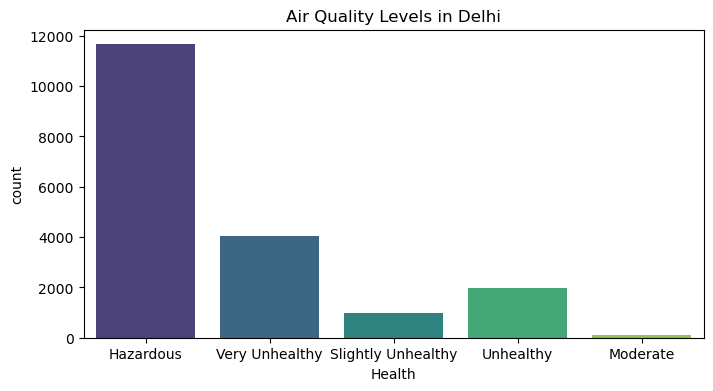

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x='Health', data=df, palette='viridis')
plt.title('Air Quality Levels in Delhi')
plt.show()

## Visualizing Average AQI by Month

C:\Users\compu\AppData\Local\Temp\ipykernel_9932\2000689451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='aqi', data=df, palette='viridis', estimator='mean')


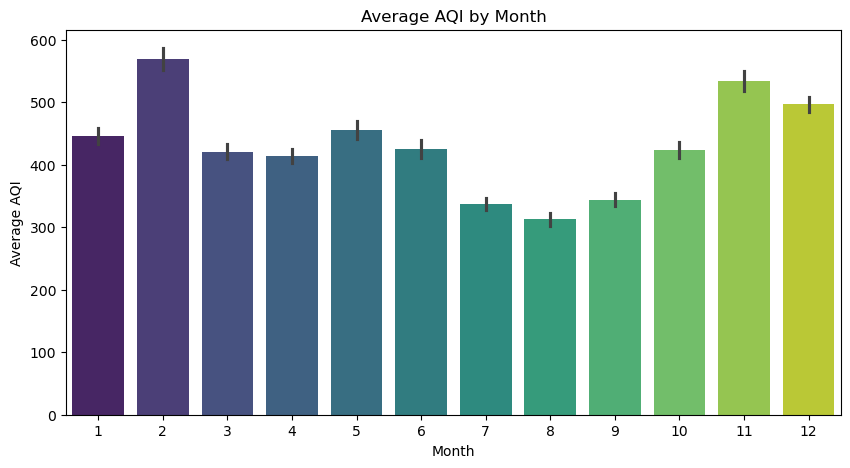

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='month', y='aqi', data=df, palette='viridis', estimator='mean')
plt.title('Average AQI by Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()

## Visualizing Average AQI by Year

C:\Users\compu\AppData\Local\Temp\ipykernel_9932\1832044167.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='aqi', data=df, palette='coolwarm', estimator='mean')


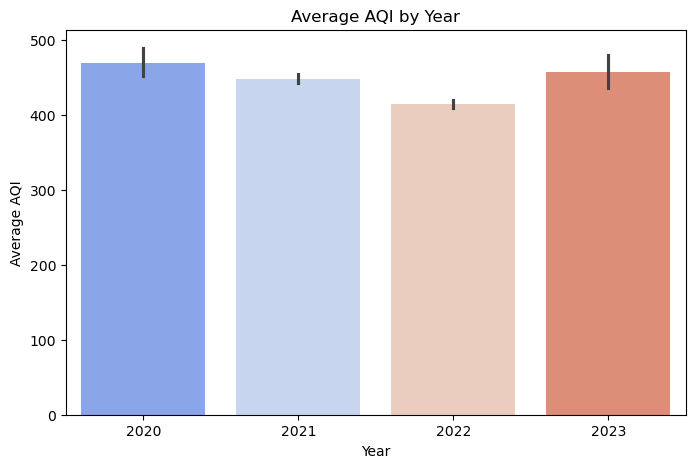

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='year', y='aqi', data=df, palette='coolwarm', estimator='mean')
plt.title('Average AQI by Year')
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.show()


In [13]:
# Encode the 'seasons' column
le = LabelEncoder()
df['seasons'] = le.fit_transform(df['seasons'])
df['seasons'].unique()

array([0, 3, 2, 1])

## Preparing Training and Test Data

In [ ]:
df_train = df[df['year'] != 2023].drop(['date','Health'], axis=1)
df_test = df[df['year'] == 2023].drop(['date','Health'], axis=1)

X = df_train.drop('aqi', axis=1)
y = df_train['aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)


## Training Model

In [ ]:
model = LGBMRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2061
[LightGBM] [Info] Number of data points in the train set: 14572, number of used features: 11
[LightGBM] [Info] Start training from score 434.784330


## Visualizing Actual vs Predicted AQI

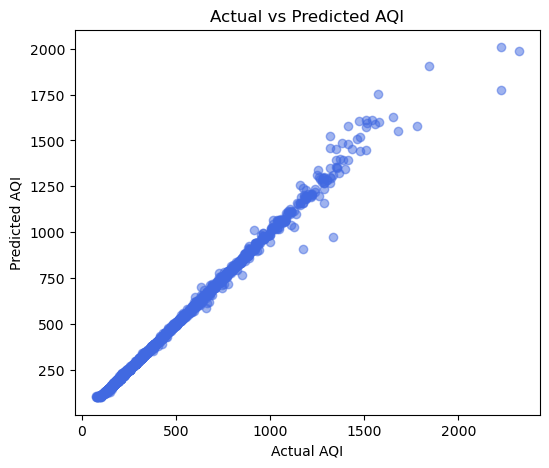

In [27]:
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5, color='royalblue')
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI")
plt.show()

## Reflections

- **Seasonal Trends:**  
  Delhi’s air quality is **worst in winter and autumn**, while **monsoon and summer** have moderate pollution. PM2.5 is the most severe pollutant in summer, while other pollutants like NO2, O3, CO, SO2, and NH3 vary from satisfactory to moderate.

- **Daily and Weekly Variation:**  
  AQI is generally **better in the morning** and worsens by evening. Pollution is **higher on weekdays** compared to weekends due to traffic and industrial activity.

- **Health and Severity:**  
  Many days fall into `Unhealthy` or `Very Unhealthy` categories, indicating serious **health risks** including respiratory and cardiovascular problems.

- **Contributing Factors:**  
  Pollution comes from **vehicular emissions, industries, construction, and crop burning**, as reflected in the AQI calculations.

- **Government and Personal Actions:**  
  Measures like **odd-even traffic rules** and air quality monitoring exist. Individuals can help by **reducing personal vehicle use and emissions**.

- **Model Insights:**  
  The AQI prediction model aligns well with actual values, helping **anticipate high pollution days** for public health planning. Continuous efforts are needed to improve air quality.
